### **MENATL HEALTH TREATMENT SEEKING BEHAVIOR PREDICTION AMONG TECH SECTOR EMPLOYEES**

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/survey.csv")


df.shape
df.columns.tolist()
df.head()


Mounted at /content/drive


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
import pandas as pd
column_dtypes = df.dtypes
missing_values = df.isna().sum()

dtype_and_missing = pd.DataFrame({
    'Data Type': column_dtypes,
    'Missing Values': missing_values
})

print(dtype_and_missing)

                          Data Type  Missing Values
Timestamp                    object               0
Age                           int64               0
Gender                       object               0
Country                      object               0
state                        object             515
self_employed                object              18
family_history               object               0
treatment                    object               0
work_interfere               object             264
no_employees                 object               0
remote_work                  object               0
tech_company                 object               0
benefits                     object               0
care_options                 object               0
wellness_program             object               0
seek_help                    object               0
anonymity                    object               0
leave                        object               0
mental_healt

In [ ]:
columns = ['Gender', 'self_employed', 'family_history', 'treatment','leave']
unique_values = {col: df[col].unique().tolist() for col in columns}

unique_values


{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'self_employed': [nan, 'Yes', 'No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy']}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


missing_df = df[df.columns[df.isna().any()]]
missing_percentage = df.isna().mean() * 100


high_missing_cols = missing_percentage[missing_percentage > 40]


high_missing_df = pd.DataFrame({
    'Missing %': high_missing_cols,
})

high_missing_df

,Missing %
state,40.905481
comments,86.973789


preprocessing

In [ ]:

male_keywords = [
    'male', 'm', 'man', 'cis male', 'male-ish', 'msle',
    'malr', 'maile', 'make', 'male (cis)', 'cis man'
]

female_keywords = [
    'female', 'f', 'woman', 'cis female', 'femake',
    'femail', 'cis-female/femme', 'female (cis)'
]


def map_gender(gender):
    if pd.isna(gender):
        return 'Other'
    gender = gender.strip().lower()
    if gender in male_keywords:
        return 'Male'
    elif gender in female_keywords:
        return 'Female'
    else:
        return 'Other'


df['Gender_cleaned'] = df['Gender'].apply(map_gender)


gender_counts = df['Gender_cleaned'].value_counts()
print(gender_counts)


Gender_cleaned
Male      989
Female    247
Other      23
Name: count, dtype: int64


In [ ]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 80)]
df.shape

(1251, 28)

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[numeric_cols].isna().sum()

,0
Age,0


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].isna().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

df[categorical_cols].isna().sum()


,0
Timestamp,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0


In [ ]:
df = df.drop(columns=['Timestamp'])
df.shape, df.columns.tolist()

((1251, 27),
 ['Age',
  'Gender',
  'Country',
  'state',
  'self_employed',
  'family_history',
  'treatment',
  'work_interfere',
  'no_employees',
  'remote_work',
  'tech_company',
  'benefits',
  'care_options',
  'wellness_program',
  'seek_help',
  'anonymity',
  'leave',
  'mental_health_consequence',
  'phys_health_consequence',
  'coworkers',
  'supervisor',
  'mental_health_interview',
  'phys_health_interview',
  'mental_vs_physical',
  'obs_consequence',
  'comments',
  'Gender_cleaned'])

In [ ]:
df = df.drop(columns=['Country','comments','Gender'])
df.shape, df.columns.tolist()

((1251, 24),
 ['Age',
  'state',
  'self_employed',
  'family_history',
  'treatment',
  'work_interfere',
  'no_employees',
  'remote_work',
  'tech_company',
  'benefits',
  'care_options',
  'wellness_program',
  'seek_help',
  'anonymity',
  'leave',
  'mental_health_consequence',
  'phys_health_consequence',
  'coworkers',
  'supervisor',
  'mental_health_interview',
  'phys_health_interview',
  'mental_vs_physical',
  'obs_consequence',
  'Gender_cleaned'])

### **EDA**

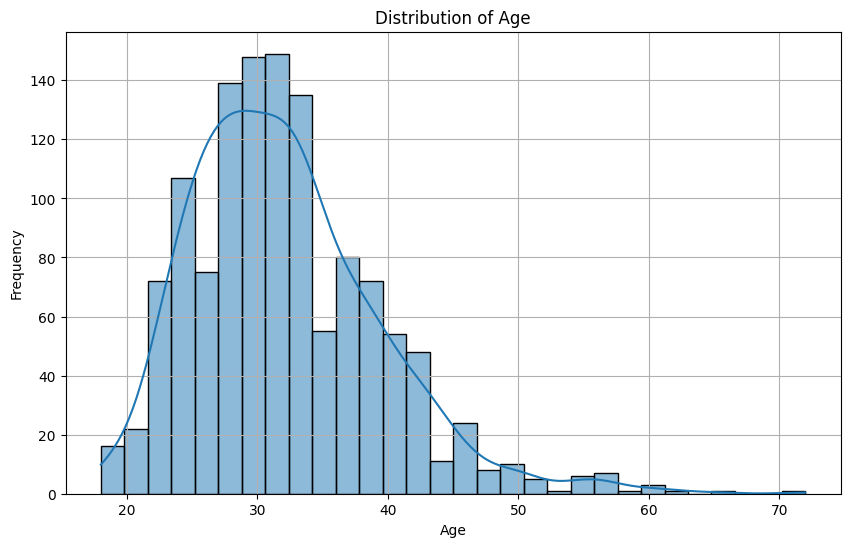

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

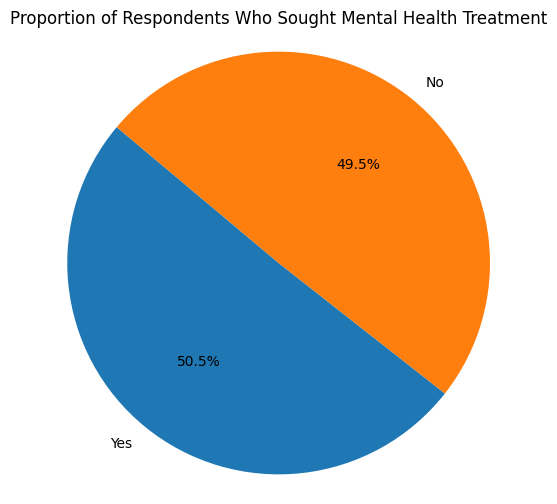

In [ ]:
treatment_counts = df['treatment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Respondents Who Sought Mental Health Treatment")
plt.axis('equal')
plt.show()


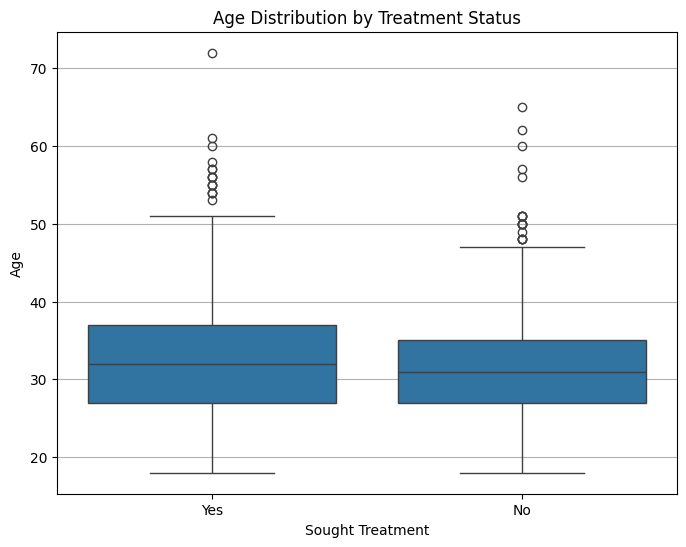

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='treatment', y='Age')
plt.title("Age Distribution by Treatment Status")
plt.xlabel("Sought Treatment")
plt.ylabel("Age")
plt.grid(True, axis='y')
plt.show()


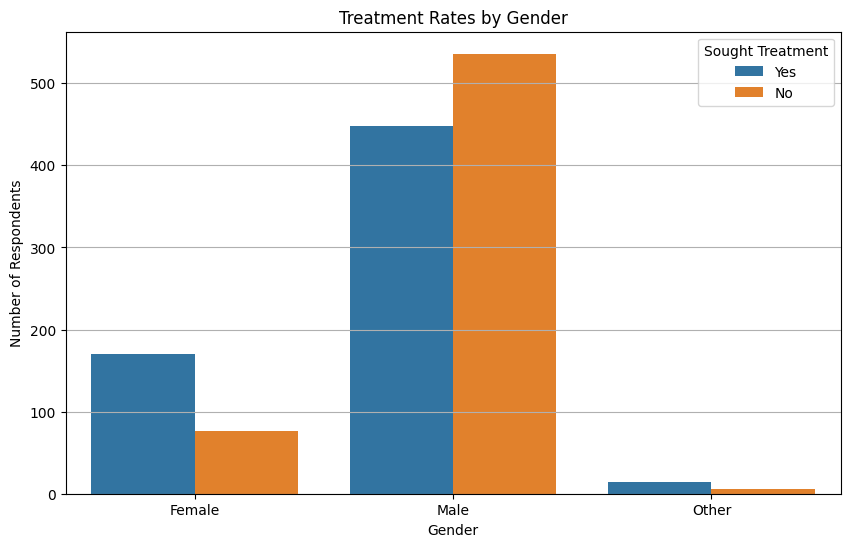

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender_cleaned', hue='treatment')
plt.title("Treatment Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.grid(True, axis='y')
plt.show()

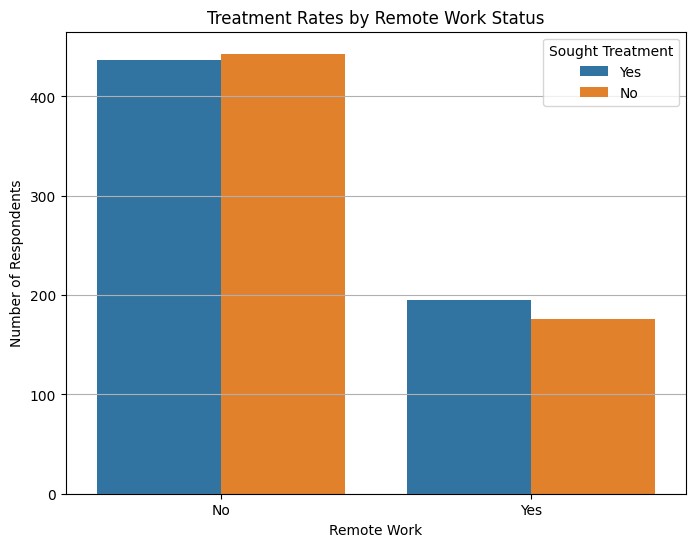

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title("Treatment Rates by Remote Work Status")
plt.xlabel("Remote Work")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.grid(True, axis='y')
plt.show()

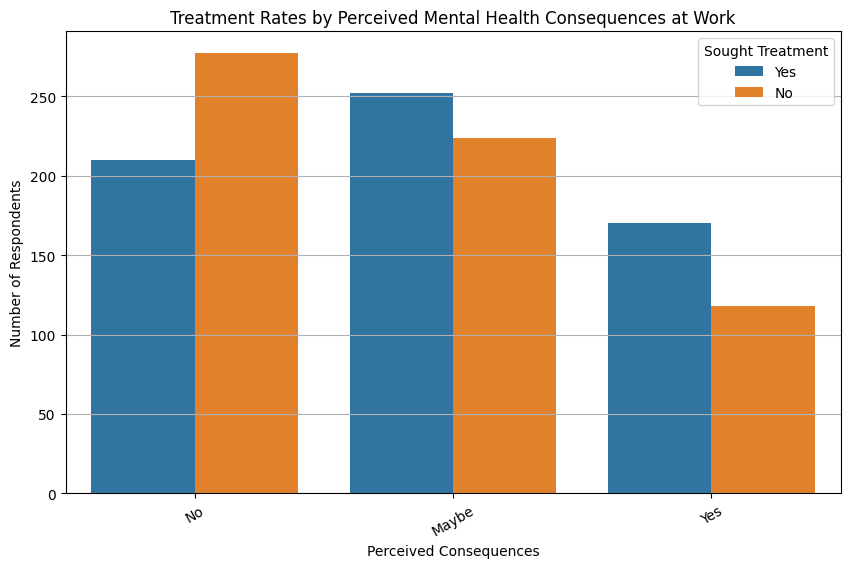

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='mental_health_consequence', hue='treatment')
plt.title("Treatment Rates by Perceived Mental Health Consequences at Work")
plt.xlabel("Perceived Consequences")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.xticks(rotation=30)
plt.grid(True, axis='y')
plt.show()

### **Feature engineering**


In [ ]:
print(df.select_dtypes(include='object').nunique())
df.select_dtypes(include='object').nunique()

Timestamp                    1239
Gender                         46
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
Gender_cleaned                  3
dtype: int64


,0
Timestamp,1239
Gender,46
self_employed,2
family_history,2
treatment,2
work_interfere,4
no_employees,6
remote_work,2
tech_company,2
benefits,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['treatment'] = le.fit_transform(df['treatment'])

In [ ]:
import pandas as pd

exclude_cols = ['Age', 'treatment']
threshold = 0.01
min_count = int(threshold * len(df))


cols_to_check = [col for col in df.columns if col not in exclude_cols and df[col].dtype == 'object']
for col in cols_to_check:
    value_counts = df[col].value_counts()
    rare_values = value_counts[value_counts < min_count].index
    df[col] = df[col].replace(rare_values, 'Other')


cols_to_encode = [col for col in df.columns if col not in exclude_cols]
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)


print("Final encoded shape:", df_encoded.shape)


Final encoded shape: (1251, 45)


In [ ]:
df_encoded.columns

Index(['Age', 'treatment', 'self_employed_Yes', 'family_history_Yes',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'no_employees_100-500',
       'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_health_interview_No',
       'mental_health_interview_Yes', 'phys_health_interview_No',
      

In [ ]:
for col in cols_to_check:
    if 'Other' in df[col].values:
        print(f"{col}: {df[col].value_counts()['Other']} 'Other' entries")


state: 103 'Other' entries
Gender_cleaned: 20 'Other' entries


In [ ]:
df = df.drop(columns=['state'])

In [ ]:
print(X.dtypes.value_counts())


float64    63
Name: count, dtype: int64


In [ ]:

X = df_encoded.drop(columns=['treatment']).astype(float)


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data.sort_values(by="VIF", ascending=False))


                          feature        VIF
0                             Age  18.123084
35     mental_health_interview_No   7.648857
17            wellness_program_No   7.244416
12               tech_company_Yes   5.769836
29     phys_health_consequence_No   5.592890
42            Gender_cleaned_Male   5.414915
31         coworkers_Some of them   5.278174
34                 supervisor_Yes   4.601667
5        work_interfere_Sometimes   4.485965
19                   seek_help_No   4.379126
10    no_employees_More than 1000   4.152467
14                   benefits_Yes   3.610004
7             no_employees_26-100   3.603495
9               no_employees_6-25   3.334729
27   mental_health_consequence_No   3.167479
18           wellness_program_Yes   3.055478
13                    benefits_No   2.974440
32                  coworkers_Yes   2.956186
16               care_options_Yes   2.788187
20                  seek_help_Yes   2.694911
6            no_employees_100-500   2.663320
33        

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

y=df['treatment']

lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lasso.fit(X_scaled, y)


selector = SelectFromModel(lasso, prefit=True)


X_lasso_selected = selector.transform(X_scaled)


selected_features = X.columns[selector.get_support()]
print("Selected features by L1 Logistic Regression:")
print(selected_features.tolist())


Selected features by L1 Logistic Regression:
['Age', 'self_employed_Yes', 'family_history_Yes', 'work_interfere_Often', 'work_interfere_Rarely', 'work_interfere_Sometimes', 'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_Yes', 'tech_company_Yes', 'benefits_Yes', 'care_options_Not sure', 'care_options_Yes', 'wellness_program_No', 'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes', 'leave_Somewhat difficult', 'leave_Somewhat easy', 'leave_Very difficult', 'leave_Very easy', 'mental_health_consequence_No', 'mental_health_consequence_Yes', 'phys_health_consequence_No', 'phys_health_consequence_Yes', 'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them', 'supervisor_Yes', 'mental_health_interview_No', 'mental_health_interview_Yes', 'phys_health_interview_No', 'phys_health_interview_Yes', 'mental_vs_physical_No', 'mental_vs_physical_Yes', 'obs_consequence_Yes', 'Gender_cleaned_Male']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel


lasso_selector = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_selector.fit(X_scaled, y)


selector = SelectFromModel(lasso_selector, prefit=True)
selected_features = X.columns[selector.get_support()].tolist()


In [ ]:
import numpy as np


coefs = np.abs(lasso.coef_[0])


top_10_indices = np.argsort(coefs)[-10:]


selected_features = X.columns[top_10_indices]
print("Top 10 features selected by L1 Logistic Regression:")
print(selected_features.tolist())


X_top10 = X_scaled[selected_features]


Top 10 features selected by L1 Logistic Regression:
['mental_health_consequence_No', 'benefits_Yes', 'Gender_cleaned_Male', 'coworkers_Some of them', 'care_options_Yes', 'coworkers_Yes', 'family_history_Yes', 'work_interfere_Sometimes', 'work_interfere_Rarely', 'work_interfere_Often']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X_top10, y, test_size=0.2, random_state=42, stratify=y)


clf = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[102  22]
 [ 33  94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       124
           1       0.81      0.74      0.77       127

    accuracy                           0.78       251
   macro avg       0.78      0.78      0.78       251
weighted avg       0.78      0.78      0.78       251



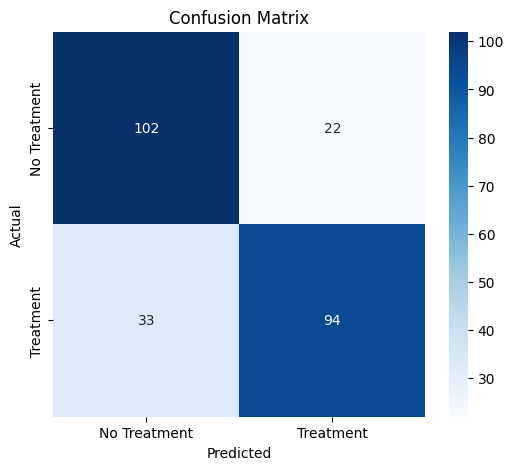

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
labels = ['No Treatment', 'Treatment']


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


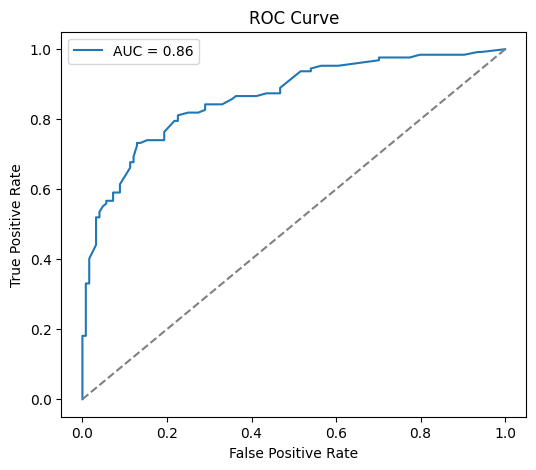

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


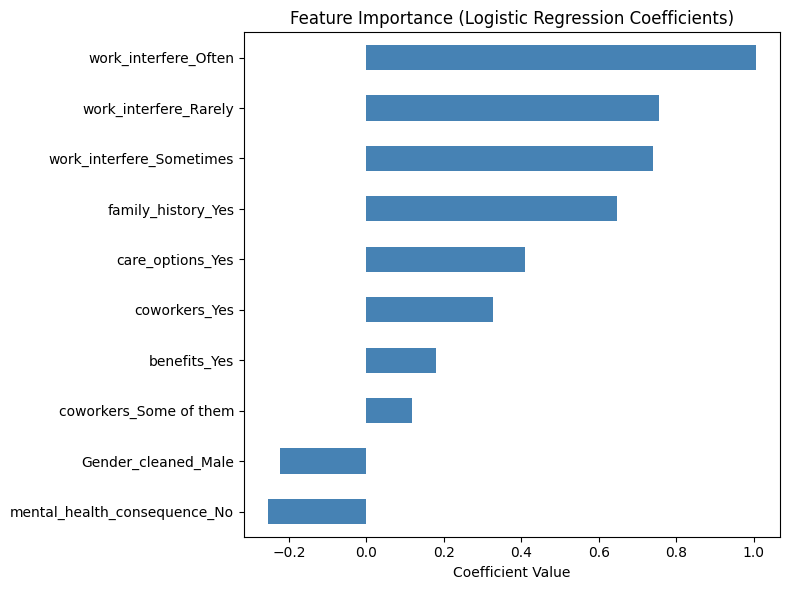

In [ ]:

coefficients = pd.Series(clf.coef_[0], index=X_top10.columns)
coefficients = coefficients.sort_values()


plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh', color='steelblue')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


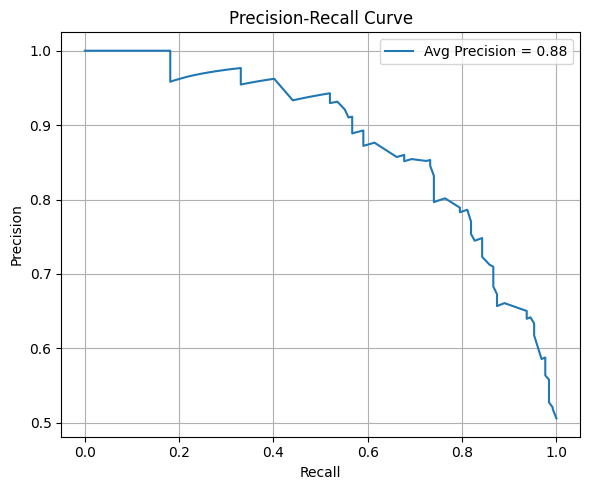

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score


y_scores = clf.predict_proba(X_test)[:, 1]


precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)


plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
    LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced', max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_top10, y)
print("Best C:", grid.best_params_['C'])
print("Cross-validated Accuracy:", grid.best_score_)


Best C: 10
Cross-validated Accuracy: 0.7410167330677291


In [ ]:
final_model = LogisticRegression(
    C=10,
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train, y_train)


LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [ ]:
y_pred2 = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.76      0.82      0.79       124
           1       0.81      0.74      0.77       127

    accuracy                           0.78       251
   macro avg       0.78      0.78      0.78       251
weighted avg       0.78      0.78      0.78       251



In [ ]:
#top 15 features
import numpy as np
coefs = np.abs(final_model.coef_[0])
top_15_indices = np.argsort(coefs)[-15:]
top_15_features = X.columns[top_15_indices]


Top 15 selected features:
 ['mental_health_interview_No', 'leave_Somewhat difficult', 'Age', 'supervisor_Yes', 'seek_help_No', 'mental_health_consequence_No', 'benefits_Yes', 'Gender_cleaned_Male', 'coworkers_Some of them', 'care_options_Yes', 'coworkers_Yes', 'family_history_Yes', 'work_interfere_Sometimes', 'work_interfere_Rarely', 'work_interfere_Often']

Classification Report:

              precision    recall  f1-score   support

          No       0.76      0.83      0.80       124
         Yes       0.82      0.75      0.78       127

    accuracy                           0.79       251
   macro avg       0.79      0.79      0.79       251
weighted avg       0.79      0.79      0.79       251



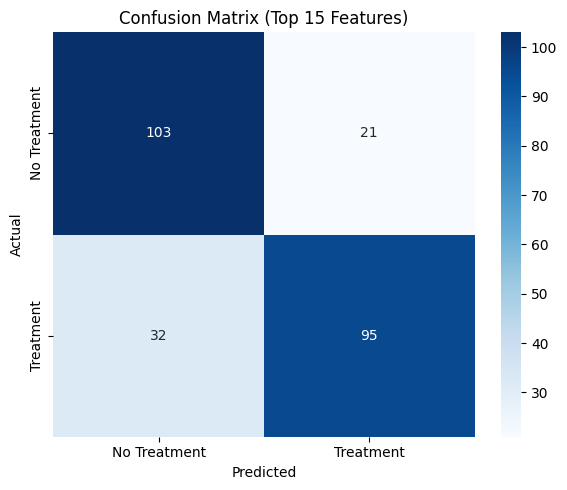

ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    accuracy_score
)




model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
model_l1.fit(X_scaled, y)


coefs = np.abs(model_l1.coef_[0])
top_15_indices = np.argsort(coefs)[-15:]
top_15_features = X_scaled.columns[top_15_indices]
print("Top 15 selected features:\n", top_15_features.tolist())

X_top15 = X_scaled[top_15_features]


X_train15, X_test15, y_train15, y_test15 = train_test_split(X_top15, y, test_size=0.2, stratify=y, random_state=42)


final_model = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    C=10,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train15, y_train15)


y_pred15 = final_model.predict(X_test15)
y_prob15 = final_model.predict_proba(X_test15)[:, 1]


print("\nClassification Report:\n")
print(classification_report(y_test15, y_pred15))


cm = confusion_matrix(y_test15, y_pred15)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Top 15 Features)')
plt.tight_layout()
plt.show()


comparison_df = pd.DataFrame({
    'Actual': y_test15.map({0: 'No Treatment', 1: 'Treatment'}).values,
    'Predicted': pd.Series(y_pred15).map({0: 'No Treatment', 1: 'Treatment'}).values
})



precision, recall, _ = precision_recall_curve(y_test15, y_prob15)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Top 15 Features)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
